<a href="https://colab.research.google.com/github/polarkk8/Python-Analysis-of-Salary-Data-/blob/main/Python_Analysis_of_Salary_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Statistics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

Missing values:
YearsExperience    0
Salary             0
dtype: int64

Correlation coefficient: 0.978


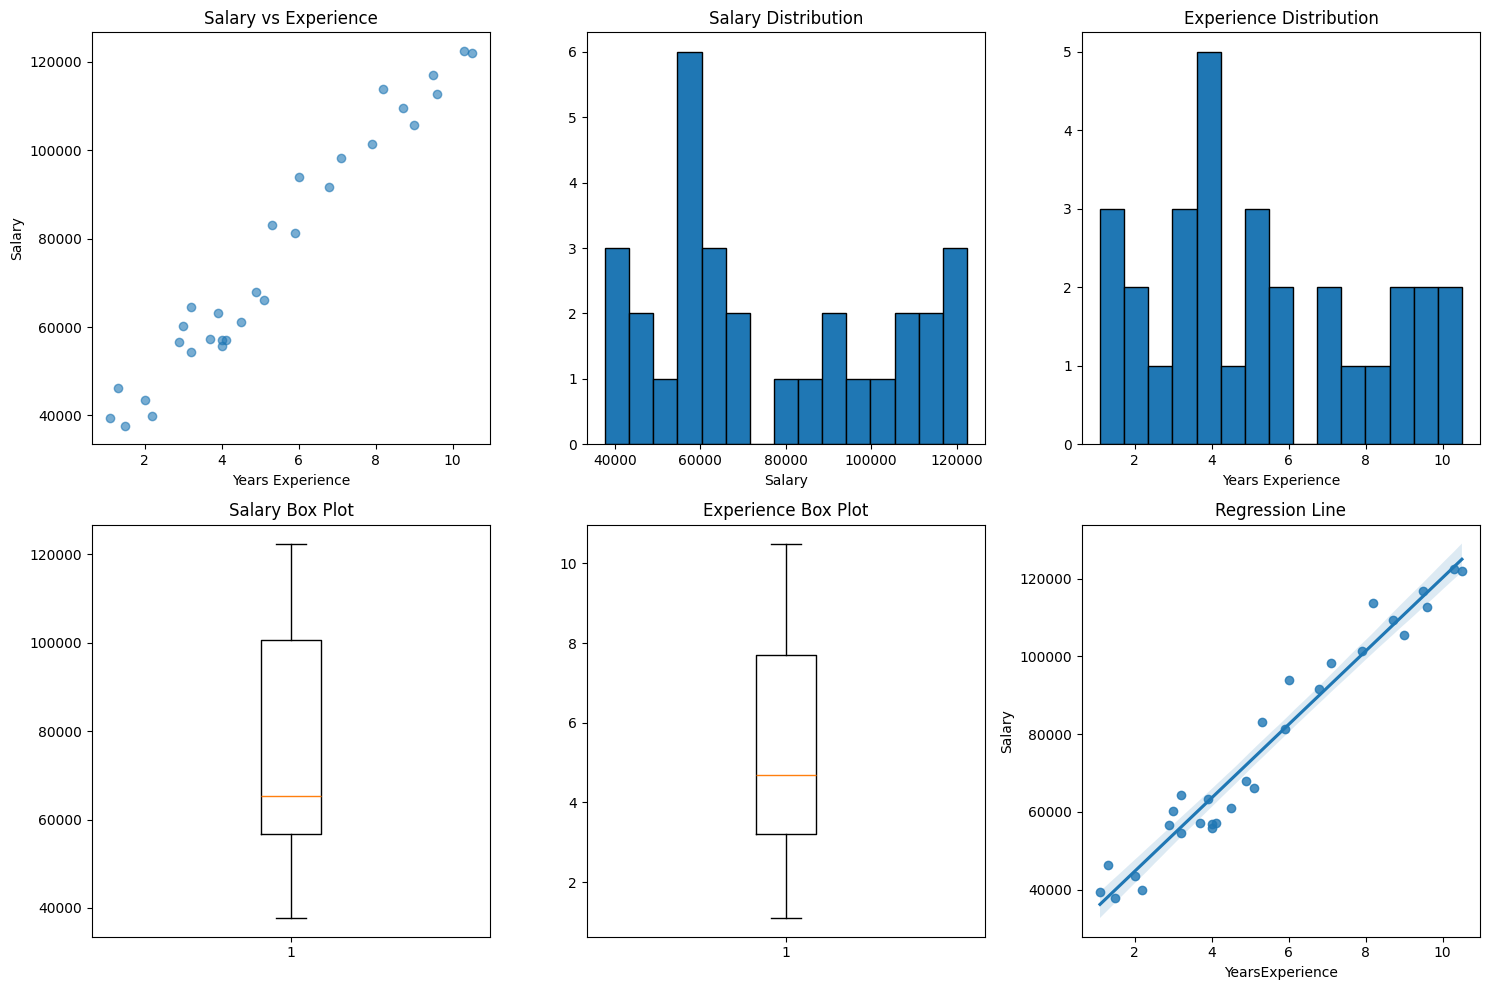


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.14e-20
Time:                        18:25:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.57

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

#Load data
df = pd.read_csv('Salary_Data.csv')

#Initial exploration
print("Basic Statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

#Correlation analysis
correlation = df['YearsExperience'].corr(df['Salary'])
print(f"\nCorrelation coefficient: {correlation:.3f}")

#Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#Scatter plot
axes[0,0].scatter(df['YearsExperience'], df['Salary'], alpha=0.6)
axes[0,0].set_title('Salary vs Experience')
axes[0,0].set_xlabel('Years Experience')
axes[0,0].set_ylabel('Salary')

#Distribution plots
axes[0,1].hist(df['Salary'], bins=15, edgecolor='black')
axes[0,1].set_title('Salary Distribution')
axes[0,1].set_xlabel('Salary')

axes[0,2].hist(df['YearsExperience'], bins=15, edgecolor='black')
axes[0,2].set_title('Experience Distribution')
axes[0,2].set_xlabel('Years Experience')

#Box plots
axes[1,0].boxplot(df['Salary'])
axes[1,0].set_title('Salary Box Plot')

axes[1,1].boxplot(df['YearsExperience'])
axes[1,1].set_title('Experience Box Plot')

#Correlation heatmap (single variable correlation)
sns.regplot(x='YearsExperience', y='Salary', data=df, ax=axes[1,2])
axes[1,2].set_title('Regression Line')

plt.tight_layout()
plt.show()

#Advanced analysis
# Linear regression
X = df['YearsExperience']
y = df['Salary']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Results:")
print(model.summary())

#Calculate salary growth metrics
df_sorted = df.sort_values('YearsExperience')
df_sorted['SalaryGrowth'] = df_sorted['Salary'].pct_change() * 100
print("\nAverage annual salary growth: {:.2f}%".format(
    df_sorted['SalaryGrowth'].mean()
))